<a href="https://colab.research.google.com/github/dhanushkodi45rS/Titanic-survival-pred/blob/main/titanic_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df = pd.read_csv('/content/titanic.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

selecting relevant columns

In [5]:
df =df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']].dropna()

In [6]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

visualize EDA

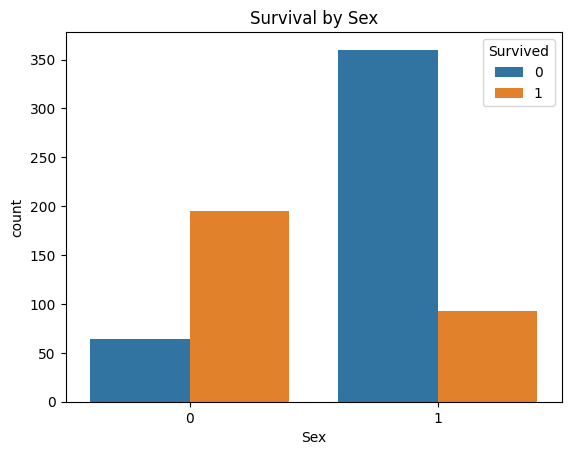

In [8]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Sex")
plt.show()

prepare data

In [9]:
X = df.drop('Survived', axis=1)
Y = df['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Feature Scaling

In [10]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

Logistics Regression

In [11]:
log_model = LogisticRegression()
log_model.fit(X_train_scaler, Y_train)
log_pred = log_model.predict(X_test_scaler)

Decision Tree

In [16]:
tree_model =DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(X_test)

Evaluate

In [18]:
print("Logistic Regression Accuracy:", accuracy_score(Y_test, log_pred))
print("Decision Tree Accuracy:", accuracy_score(Y_test, tree_pred))
print("\nLogistic Classification Report:\n", classification_report(Y_test, log_pred))
print("\nDecision Tree Classification Report:\n", classification_report(Y_test, tree_pred))

Logistic Regression Accuracy: 0.7902097902097902
Decision Tree Accuracy: 0.7132867132867133

Logistic Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75        80
           1       0.68      0.67      0.67        63

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.71      0.71      0.71       143

